<center>
<h1> Fundamentos en Visualización de Datos </h1>

## 1. Preparación de los Datos

In [1]:
import pandas as pd 
import numpy as np
from __future__ import print_function

# Cargar datos desde un archivo excel
df = pd.read_excel('Canada_immigration.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

# Eliminar las columnas innecesarias y cambiar el nombre
df_new = df.drop(['Type','Coverage','AREA','REG','DEV'], axis = 1)
df_new.rename(columns = {"OdName":"Country"}, inplace = True)
df_new.rename(columns = {"AreaName":"Continent"}, inplace = True)
df_new.rename(columns = {"RegName":"Region"}, inplace = True)

# Crear una nueva columna con el total de migraciones
Total =  df.loc[:, 1980:2013].sum(axis=1)

# Unir a nuestro dataframe la nueva columna creada
df_new = pd.concat([df_new, Total], axis=1)

# Renombrar la columna total con el nombre adecuado
df_new.rename(columns = {0:"Total"}, inplace = True)

# Establecer la columna 'Country' como Index 
df_new = df_new.set_index('Country')

## 2. Herramientas Básicas de Visualización

<center>
<b><h3> 2.1. Gráfico de Líneas </h3></b>
</center>

Los gráficos de líneas son ideales para visualizar tendencias y cambios en una variable a lo largo del tiempo o en una secuencia ordenada. Son efectivos para mostrar relaciones de orden y cambios continuos en los datos.

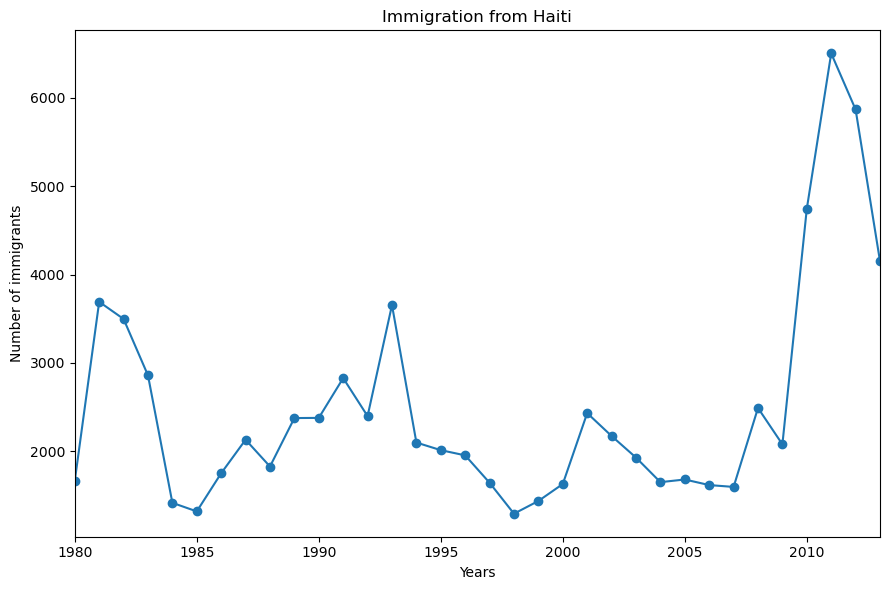

In [2]:
# Gráfico de lineas

import matplotlib.pyplot as plt

# Lista de años
years = range(1980, 2014)

# Crear gráfico
plt.figure(figsize=(9, 6))  # Ajusta el tamaño de la figura según tus necesidades
plt.plot(years, df_new.loc['Haiti', years], marker='o')  # Usamos plt.plot directamente

# Configurar etiquetas y título
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.title('Immigration from Haiti')

# Ajustar límites del eje x para coincidir con los datos
plt.xlim(min(years), max(years))

# Mostrar la gráfica centrada en el notebook
plt.tight_layout()
plt.show()

<center>
<b><h3> 2.2. Gráfico de Áreas </h3></b>
</center>

Los gráficos de área son útiles para comparar la distribución relativa de varias variables a lo largo del tiempo. Son efectivos para mostrar la tendencia general y las fluctuaciones en los datos a lo largo de una dimensión temporal.

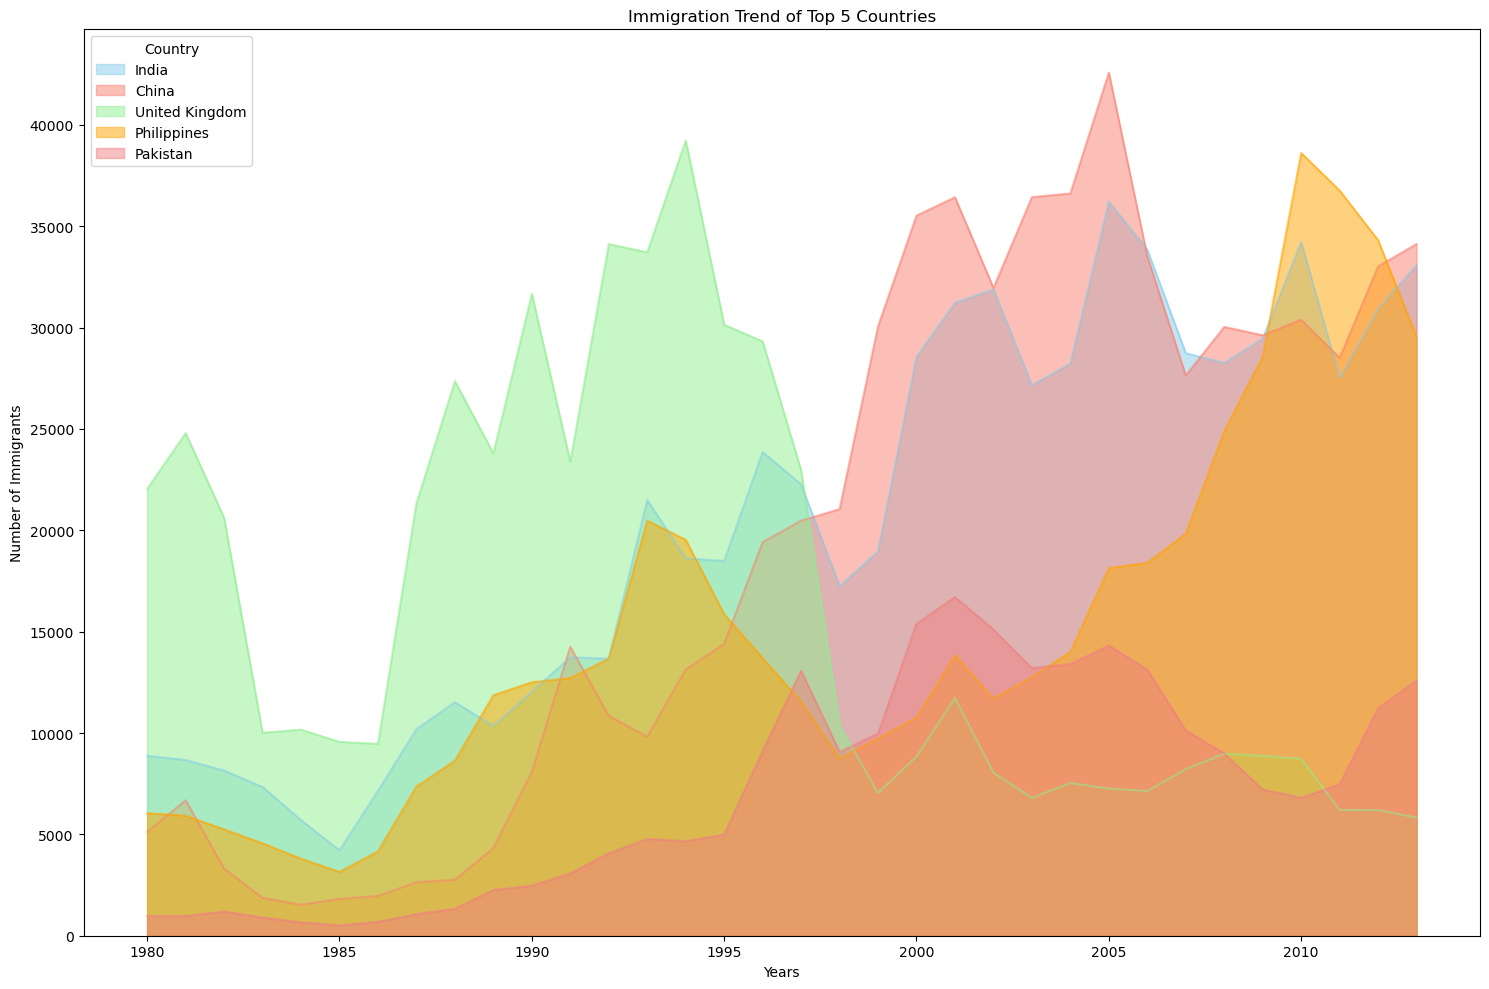

In [3]:
import matplotlib.pyplot as plt

# Ordenar los datos por el total de inmigrantes y seleccionar los 5 principales países
df_new.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
df_top5 = df_new.head()
df_top5 = df_top5[years].transpose()
df_top5.rename(columns = {'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}, inplace = True)

# Definir una paleta de colores específica para el gráfico
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

# Crear gráfico de área
df_top5.plot(kind='area',
             alpha = 0.5,
             stacked=False,
             color = colors,
             figsize=(15, 10))  # pass a tuple (x, y) size

# Configurar etiquetas y título
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# Mostrar la gráfica centrada en el notebook
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Years')

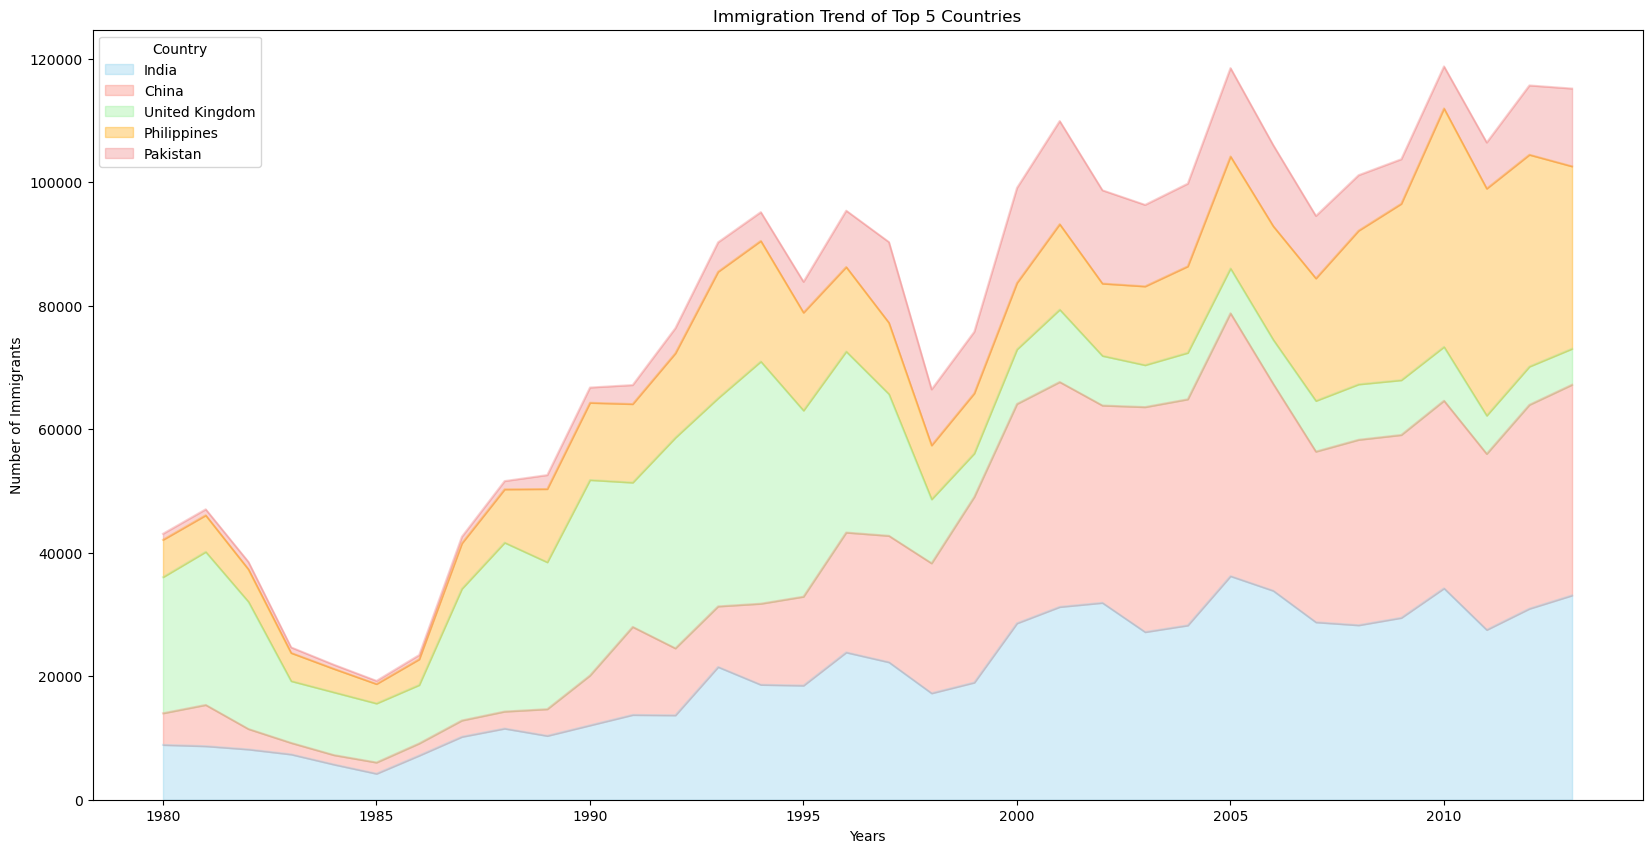

In [4]:
# Opción 2

# Definir una paleta de colores específica para el gráfico
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

# Crear gráfico de área
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10), color = colors)

# Configurar etiquetas y título
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

<center>
<b><h3> 2.3. Histograma </h3></b>
</center>

Los histogramas son útiles para visualizar la distribución de una variable numérica. Son efectivos para identificar la forma de la distribución, detectar valores atípicos y comprender la concentración de valores alrededor de ciertos puntos.

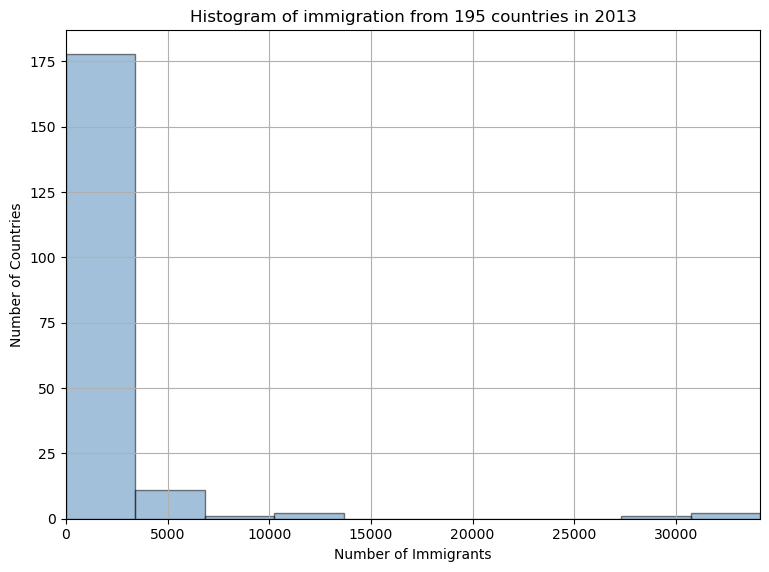

In [162]:
# Gráfico de Histograma

import matplotlib.pyplot as plt
import numpy as np

# Calcular el histograma
count, bin_edges = np.histogram(df_new[2013])

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))  # Ajustar el tamaño de la figura según tus necesidades

# Graficar el histograma
df_new[2013].plot(kind='hist', bins=10, alpha=0.5, color='steelblue', edgecolor='black', ax=ax)

# Ajustar etiquetas y título
ax.set_ylabel('Number of Countries')
ax.set_xlabel('Number of Immigrants')
ax.set_title('Histogram of immigration from 195 countries in 2013')

# Ajustar límites del eje x
ax.set_xlim(bin_edges[0], bin_edges[-1])

# Centrar la gráfica en la figura
ax.set_position([0.1, 0.1, 0.8, 0.8])  # Ajustar los valores según sea necesario

# Mostrar la gráfica
plt.grid(True)  # Mostrar cuadrícula
plt.tight_layout()  # Ajustar espacios
plt.show()

<center>
<b><h3> 2.4. Gráfico de Barras </h3></b>
</center>

Los gráficos de barras verticales son excelentes para comparar la cantidad o frecuencia de diferentes categorías. Son ideales cuando las categorías son discretas y no hay una relación natural de orden entre ellas.

Los gráficos de barras horizontales son similares a los gráficos de barras verticales, pero son útiles cuando se tiene un gran número de categorías o etiquetas largas. Son efectivos para evitar el solapamiento de etiquetas y mejorar la legibilidad.


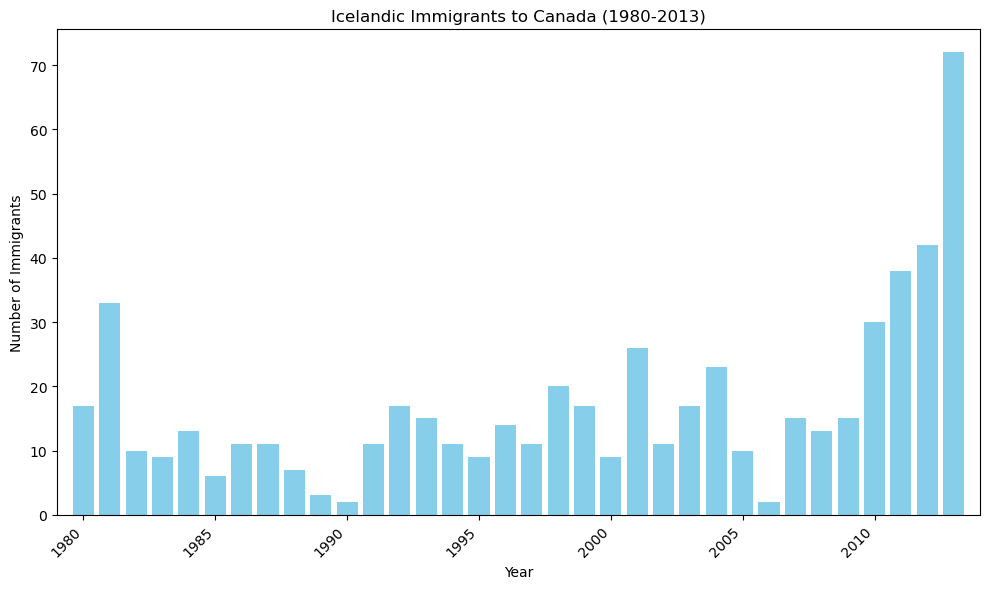

In [168]:
# Gráfico de Barras Verticales
import matplotlib.pyplot as plt

# Filtrar datos para Islandia y seleccionar años
df_iceland = df_new.loc['Iceland', years]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(df_iceland.index, df_iceland.values, color='skyblue')

# Configurar etiquetas y título
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')
plt.title('Icelandic Immigrants to Canada (1980-2013)')

# Rotar etiquetas del eje x para mejor visibilidad
plt.xticks(rotation=45, ha='right')
plt.xlim(min(years)-1, max(years)+1)

# Mostrar la gráfica
plt.tight_layout() 
plt.show()

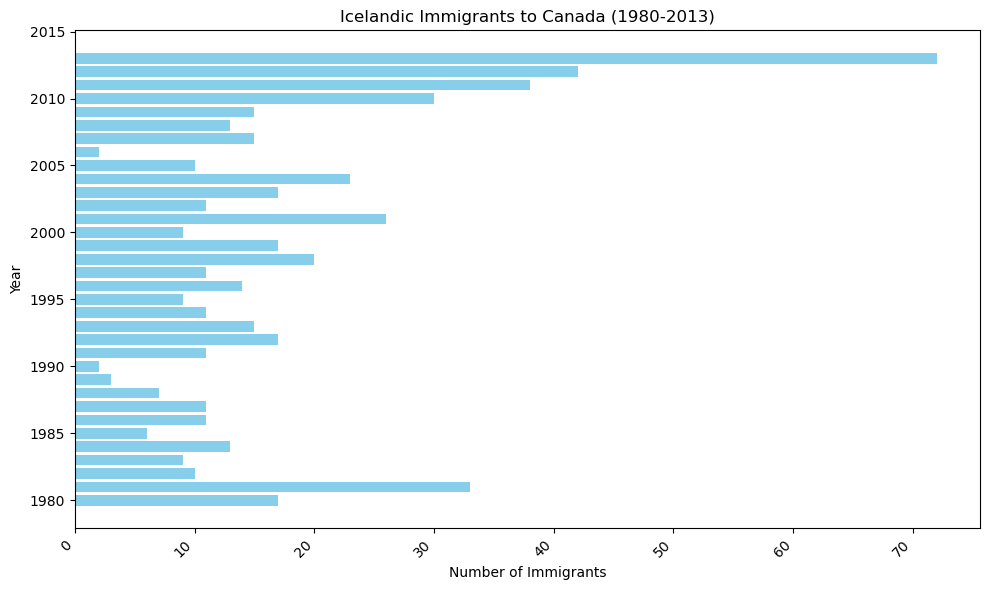

In [173]:
# Gráfico de Barras Horizontales
import matplotlib.pyplot as plt

# Filtrar datos para Islandia y seleccionar años
df_iceland = df_new.loc['Iceland', years]

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh( df_iceland.index, df_iceland.values, color='skyblue')

# Configurar etiquetas y título
plt.ylabel('Year')
plt.xlabel ('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada (1980-2013)')

# Rotar etiquetas del eje x para mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout() 
plt.show()

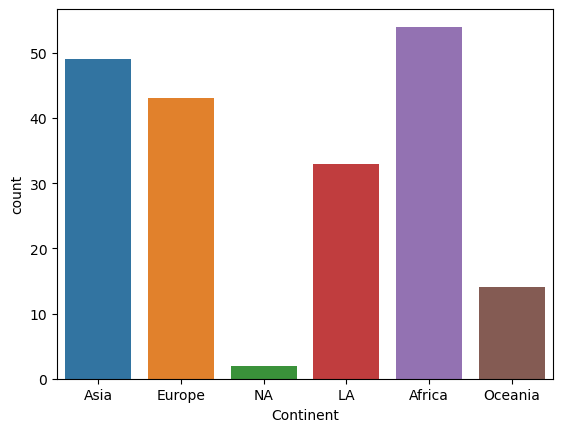

In [24]:
# Gráficos de Barras con Seaborn

import seaborn as sns

# Crear una copia del DataFrame original
df_new_copy = df_new.copy()

# Reemplazar valores en la columna 'Continent'
df_new_copy['Continent'].replace('Latin America and the Caribbean','LA', inplace =True)
df_new_copy['Continent'].replace('Northern America','NA', inplace =True)

# Crear el gráfico de barras utilizando Seaborn
ax = sns.countplot(x='Continent',data = df_new_copy)

## 3. Herramientas Especializadas de Visualización

<center>
<b><h3> 3.1. Gráfico de Pastel </h3></b>
<center>

El gráfico de pastel es útil para visualizar la distribución de una variable categórica como proporciones de un todo. Cada porción del pastel representa una categoría y el tamaño de cada porción muestra la proporción de esa categoría en relación con el total. Este tipo de gráfico se utiliza comúnmente para mostrar la distribución de una población por categorías, la distribución de ingresos por diferentes fuentes, o la composición de un conjunto de datos por categorías.

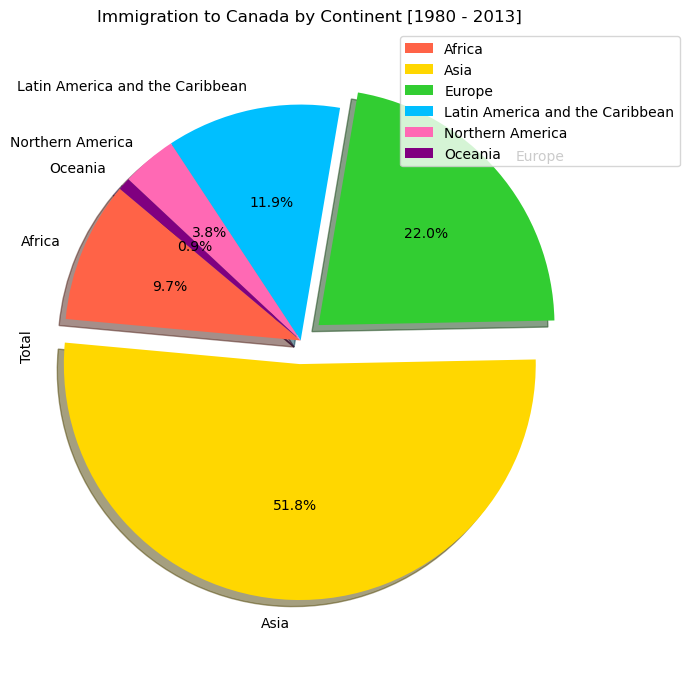

In [5]:
# Gráfico de Pastel

import matplotlib.pyplot as plt

# Agrupar datos por continente y sumar el total de inmigrantes
df_continents = df_new.groupby('Continent', axis = 0).sum()

# Crear gráfico de pastel
plt.figure(figsize=(7, 7))  # Establecer el tamaño de la figura
colors = ['#FF6347', '#FFD700', '#32CD32', '#00BFFF', '#FF69B4', '#800080']

# Colores para las porciones
explode = (0, 0.1, 0.1, 0, 0, 0)  # Destacar solo la primera porción

# Crear el gráfico de pastel con colores y explosión
df_continents['Total'].plot(kind='pie', autopct='%1.1f%%', startangle=140,
                            shadow=True, colors=colors, explode=explode)

# Añadir leyenda con etiquetas de los continentes arriba y a la izquierda del gráfico
plt.legend(labels=df_continents.index, loc="upper right", bbox_to_anchor=(1.2, 1))

# Ajustar etiquetas y título
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')  # Mantener el aspecto de círculo

# Mostrar la gráfica
plt.tight_layout()  # Ajustar espacios
plt.show()

<center>
<b><h3> 3.2. Gráfico de Cajas y Bigotes </h3></b>
</center>

    
El gráfico de cajas y bigotes es una forma de representar estadísticamente la distribución de los datos a través de cinco dimensiones principales:

- **Mínimo:** El número más pequeño en el conjunto de datos excluyendo los valores atípicos.
- **Primer cuartil:** El número medio entre el mínimo y la mediana.
- **Segundo cuartil (Mediana):** El número medio del conjunto de datos ordenado.
- **Tercer cuartil:** El número medio entre la mediana y el máximo.
- **Máximo:** El número más grande en el conjunto de datos excluyendo los valores atípicos.

Este tipo de gráfico es útil para visualizar la distribución de los datos, identificar valores atípicos y comparar la dispersión y la centralidad de diferentes grupos de datos.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">

<Figure size 1000x600 with 0 Axes>

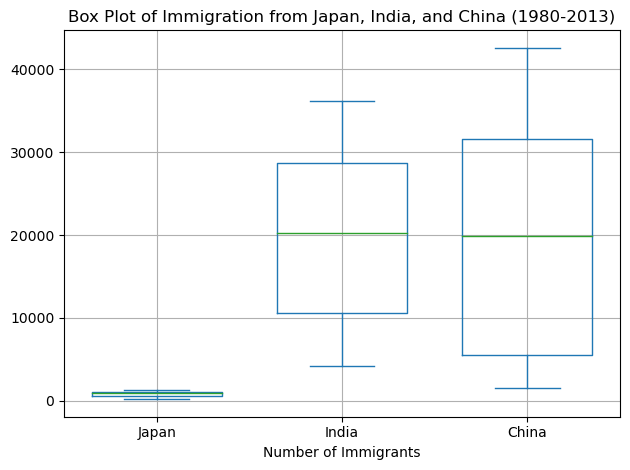

In [216]:
# Gráfico de Caja y Bigotes

import matplotlib.pyplot as plt

# Seleccionar los datos para los países específicos y transponer el DataFrame
df_countries = df_new.loc[['Japan', 'India', 'China'], years].transpose()

# Crear el gráfico de caja
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
df_countries.plot(kind='box', vert=True, widths=0.7)

# Ajustar etiquetas y título
plt.xlabel('Number of Immigrants')
plt.title('Box Plot of Immigration from Japan, India, and China (1980-2013)')

# Mostrar el gráfico
plt.grid(True)  # Agregar cuadrícula para mejor visualización de los datos
plt.tight_layout()  # Ajustar espacios
plt.show()

<Axes: xlabel='Continent', ylabel='Total'>

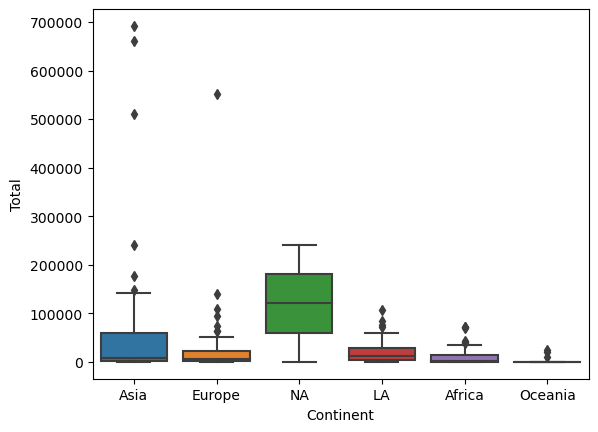

In [25]:
# Gráfico de caja con Seaborn
import seaborn as sns

# Crear el gráfico de caja utilizando Seaborn
sns.boxplot(x = 'Continent', y = 'Total', data = df_new_copy)

<center>
<b><h3> 3.3. Gráfico de Dispersión </h3></b>
</center>

Los gráficos de dispersión son efectivos para visualizar la relación entre dos variables numéricas. Son útiles para identificar patrones, tendencias y correlaciones entre las variables.

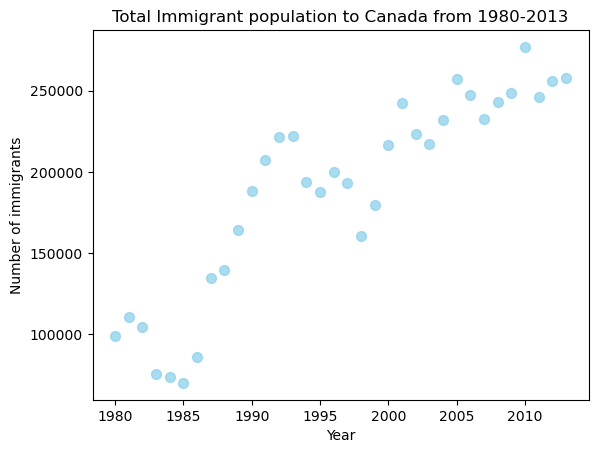

In [6]:
# Gráfico de Dispersión

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el total de inmigrantes para cada año y almacenarlo en un DataFrame
df_total = pd.DataFrame(df_new[years].sum(axis=0))
df_total.reset_index(inplace = True)
df_total.rename(columns = {'index':'year',0:'total'}, inplace = True)

import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
df_total.plot(kind='scatter', x='year', y='total', s=50, color='skyblue', alpha=0.7)

# Ajustar etiquetas y título
plt.title('Total Immigrant population to Canada from 1980-2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')

# Mostrar el gráfico
plt.show()

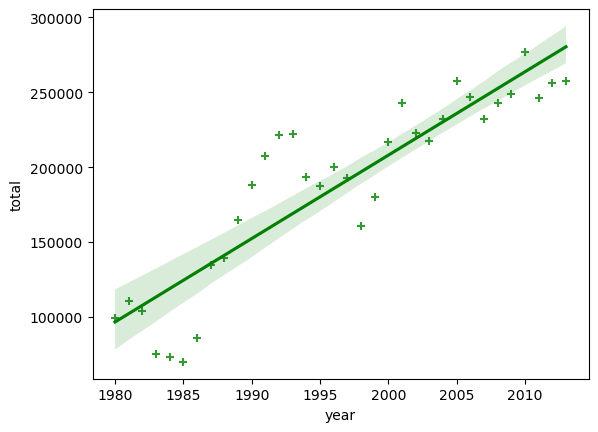

In [26]:
import seaborn as sns

# Crear el gráfico de regresión utilizando Seaborn
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')

<center>
<b><h3> 3.4. Subgráficos </h3></b>
</center>

A menudo, podemos querer trazar múltiples gráficos dentro de la misma figura. Por ejemplo, podemos querer realizar una comparación lado a lado del gráfico de cajas con el gráfico de líneas de la inmigración de China e India.

Para visualizar varios gráficos juntos, podemos crear una **figura** (lienzo general) y dividirla en **subgráficos**, cada uno conteniendo un gráfico. Con los **subgráficos**, generalmente trabajamos con la **capa de artistas** en lugar de la **capa de secuencias de comandos**.

La sintaxis típica es la siguiente: <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Donde

* `nrows` y `ncols` se utilizan para dividir nominalmente la figura en (nrows * ncols) sub-ejes,
* `plot_number` se utiliza para identificar el subgráfico particular que esta función va a crear dentro de la cuadrícula nominal. `plot_number` comienza en 1, se incrementa a través de las filas primero y tiene un máximo de `nrows` \* `ncols`.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width="500" align="center">


## 4. Herramientas Avanzadas de Visualización

<center>
<b><h3> 4.1. Gráficos de Waffles </h3></b>
</center>

Este gráfico es útil para visualizar la distribución proporcional de categorías o variables categóricas. Cada celda en el gráfico representa una parte de la totalidad, y el tamaño de las celdas varía según la proporción de cada categoría en el conjunto de datos.

Los gráficos de waffle pueden ser útiles para mostrar la composición porcentual de una población, la distribución geográfica de un fenómeno, o la distribución de recursos entre diferentes grupos.

Por ejemplo, podrías utilizar un gráfico de waffle para mostrar la distribución porcentual de votos entre diferentes partidos políticos en una elección, o la distribución de ingresos entre diferentes segmentos de la población.

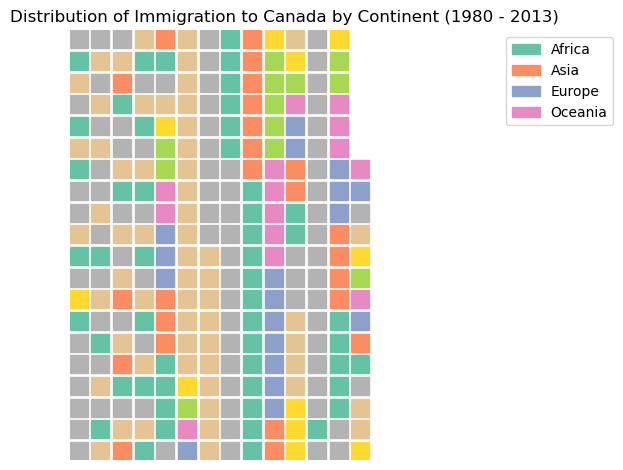

In [23]:
# Gráfico de Waffle

import matplotlib.pyplot as plt
from pywaffle import Waffle

# Preparar los datos para el gráfico de Waffle
df_waffle = df_new.set_index('Continent')  # Establecer 'Continent' como índice
df_waffle.drop(['Region', 'DevName'], inplace=True, axis=1)  # Eliminar columnas innecesarias
df_waffle = df_waffle.transpose()  # Transponer el DataFrame para tener continentes como columnas

# Seleccionar los datos para el gráfico de Waffle
data = df_waffle[['Africa', 'Asia', 'Europe', 'Oceania']].astype(int).values.flatten()

# Crear el gráfico de Waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=20,
    columns=20,
    values=data,
    legend={'labels': ['Africa', 'Asia', 'Europe', 'Oceania'],
            'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

# Añadir título al gráfico
plt.title('Distribution of Immigration to Canada by Continent (1980 - 2013)')

# Mostrar el gráfico
plt.show()

<center>
<b><h3> 4.2. Word Cloud </h3></b>
</center>

Una nube de palabras es una visualización que muestra las palabras más frecuentes en un conjunto de datos de texto, donde el tamaño de cada palabra representa su frecuencia de aparición. Las palabras más frecuentes aparecen más grandes y en negrita, mientras que las menos frecuentes son más pequeñas.

**Usos Comunes:**
- Resumir visualmente la información contenida en un corpus de texto.
- Identificar temas principales, términos clave o patrones en un conjunto de documentos.
- Analizar opiniones de clientes, comentarios en redes sociales o resultados de encuestas.

**Ejemplo de Uso:**
- Visualizar las palabras más comunes en un conjunto de publicaciones de redes sociales sobre un tema específico.
- Resumir los temas principales en las reseñas de productos en línea para identificar áreas de interés o preocupación.

**Consideraciones:**
- Ideal para resumir grandes volúmenes de texto de manera visualmente atractiva.
- Útil para identificar tendencias, patrones o temas emergentes en datos de texto.
- Requiere preprocesamiento de texto, como eliminación de stopwords y lematización, para obtener resultados más significativos.

Las nubes de palabras proporcionan una forma intuitiva y efectiva de explorar y comprender grandes cantidades de datos de texto de manera rápida y visualmente atractiva.

<center>
<h3> 4.3. Folium </h3>

[Folium](https://python-visualization.github.io/folium/) es una potente biblioteca de Python para crear varios tipos de mapas interactivos Leaflet. Sus características interactivas lo hacen particularmente útil para construir paneles dinámicos.

**Características Clave:**
- Folium aprovecha las capacidades de manipulación de datos de Python y las funcionalidades de mapeo de Leaflet.js.
- Permite manipular datos en Python y visualizarlos en un mapa Leaflet interactivo sin esfuerzo.
- Facilita la vinculación de datos para visualizaciones de coropletas y admite visualizaciones Vincent/Vega como marcadores en el mapa.
- Proporciona conjuntos de teselas integrados de OpenStreetMap, Mapbox y Stamen, con soporte para conjuntos de teselas personalizados utilizando claves de API de Mapbox o Cloudmade.
- Admite superposiciones GeoJSON y TopoJSON, facilitando la creación de mapas coropléticos con esquemas de colores de color-brewer.

**Casos de Uso Comunes:**
- Visualizar datos geográficos y relaciones espaciales de manera interactiva.
- Crear mapas dinámicos para exploración y análisis de datos.
- Construir paneles interactivos para mostrar conocimientos geográficos.

In [32]:
import folium

# Define el mapa centrado en Canadá
canada_map = folium.Map(
    location = [56.130,-106.35], # Coordenadas para centrar el mapa en Canadá
    zoom_start = 4 # Nivel de zoom inicial
)


# Añadir marcador para Ontario con popup
folium.Marker(location = [51.2538, -85.3232], popup = 'Ontario').add_to(canada_map)

# Crea un grupo de características para Ontario
ontario = folium.map.FeatureGroup()

# Agrega un marcador circular rojo para Ontario
ontario.add_child(
    folium.features.CircleMarker(
    [51.25,-85.32], radius = 5,
    color = 'red', fill_color = 'Red'
    )
)

# Agrega el grupo de características al mapa
canada_map.add_child(ontario)

In [ ]:
import folium

# Define el mapa del mundo centrado en una ubicación arbitraria
world_map = folium.Map(
    location=[56.130, -106.35],  # Coordenadas para centrar el mapa (pueden ser arbitrarias)
    zoom_start=4,  # Nivel de zoom inicial
    tiles='Stamen Toner'  # Estilo de visualización del mapa (Stamen Toner muestra meandros de ríos y zonas costeras)
)

# Mostrar el mapa
display(world_map)

In [ ]:
import folium

# Define el mapa del mundo centrado en una ubicación arbitraria
world_map = folium.Map(
    location=[56.130, -106.35],  # Coordenadas para centrar el mapa (pueden ser arbitrarias)
    zoom_start=4,  # Nivel de zoom inicial
    tiles='Stamen Terrain'  # Estilo de visualización del mapa (Stamen Terrain muestra la vegetación natural)
)

# Mostrar el mapa
display(world_map)


In [ ]:
import folium

# Crea un mapa simple con zoom inicial de 2 y baldosas de OpenStreetMap
world_map = folium.Map(
    location=[56.130, -106.35],  # Ubicación centrada arbitrariamente
    zoom_start=2,
    tiles='OpenStreetMap'
) 

# Ruta al archivo GeoJSON que contiene la información geográfica de los países
world_geo = r'world_countries.json'

# Añade un cloropleto al mapa utilizando la función folium.Choropleth
folium.Choropleth(
    geo_data=world_geo,
    data=df_new,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',  # Clave de mapeo entre el GeoJSON y los datos del DataFrame
    fill_color='YlOrRd',  # Esquema de colores para el cloropleto
    legend_name='Immigration to Canada'  # Título de la leyenda
).add_to(world_map)

# Muestra el mapa
world_map

In [38]:
import folium

# Latitud y longitud de San Francisco
latitude = 37.77
longitude = -122.42

# Crea un mapa y muéstralo
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Muestra el mapa de San Francisco
sanfran_map

In [39]:
import pandas as pd

# URL del archivo CSV
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv'

# Cargar el DataFrame desde el archivo CSV
df_incidents = pd.read_csv(path)

# Obtener los primeros 100 crímenes en el DataFrame df_incidents
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [40]:
import folium

# Latitud y longitud de San Francisco
latitude = 37.77
longitude = -122.42

# Crear el mapa de San Francisco
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Instanciar un grupo de características para los incidentes en el DataFrame
incidents = folium.map.FeatureGroup()

# Recorrer los primeros 100 crímenes y agregar cada uno al grupo de características de incidentes
for lat, lng in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,  # Define el tamaño de los marcadores circulares
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Agregar el grupo de características de incidentes al mapa de San Francisco
sanfran_map.add_child(incidents)

# Mostrar el mapa
sanfran_map

In [41]:
import folium

# Latitud y longitud de San Francisco
latitude = 37.77
longitude = -122.42

# Crear el mapa de San Francisco
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Instanciar un grupo de características para los incidentes en el DataFrame
incidents = folium.map.FeatureGroup()

# Recorrer los primeros 100 crímenes y agregar cada uno al grupo de características de incidentes como un marcador circular
for lat, lng in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,  # Define el tamaño de los marcadores circulares
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Agregar pop-up con texto a cada marcador en el mapa
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# Agregar el grupo de características de incidentes al mapa de San Francisco
sanfran_map.add_child(incidents)

# Mostrar el mapa
sanfran_map